# 2R Roboter

## Simulation nichtlineares Modell ohne Eingang

In [6]:
"""
Date: 20.12.2022
Author: Kaufmann Stefan

Robot Control - Simulation 2R Roboter 
"""
# Load Robotermodell
import numpy as np
from scipy.integrate import odeint,solve_ivp
import matplotlib.pyplot as plt
from Model import model_nlin, model_nlin_ext
import importlib as imp


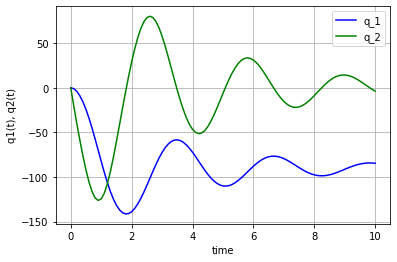

In [7]:
from Model import model_nlin, model_nlin_ext
# set the initial conditions
x0=[-np.pi/2*0,0,0,np.pi/4]

# define the discretization points
t_start = 0
t_stop = 10
dt = 1e-1

t_sim=np.linspace(t_start, t_stop, int((t_stop - t_start) / dt + 1))

class Controller:
  def __init__(self,u,t_sim):
    self.ctr = 'NONE'
    self.t  = t_sim
controller = Controller(0,t_sim)


#Wrapper für rechte Seite der Differentialgleichung
rhs=lambda t,x:model_nlin_ext(t,x,controller)
    
solOde = solve_ivp(rhs,                  #zu simulierendes Modell
                    [t_start,t_stop],    #Zeitspanne für Simulation
                    x0,                  #Anfangszustand 
                    t_eval=t_sim,        #Auswertungszeitpunkte
                    atol=1e-9,rtol=1e-6  #Toleranzen
                    )


plt.plot(solOde.t, solOde.y[0]*180/np.pi, 'b', label='q_1')
plt.plot(solOde.t, solOde.y[2]*180/np.pi, 'g', label='q_2')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('q1(t), q2(t)')
plt.grid()
#plt.savefig('simulation.png')
plt.show()

In [8]:
import Animation as anim

q1 = solOde.y[0]
q2 = solOde.y[2]
anim.plot(q1,q2,dt)


# Vorsteuerung

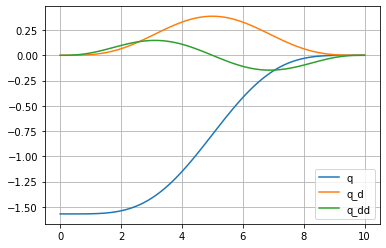

In [14]:
from Vorsteuerung import *
#from Parameter  import *

u = flat_output(t_stop,t_sim,3,x0[0],0)

plt.plot(t_sim,u[0,:])
plt.plot(t_sim,u[1,:])
plt.plot(t_sim,u[2,:])
plt.legend(['q','q_d','q_dd'])
plt.grid()
plt.show()





## Multivariable Control (Inverse Dynamik)

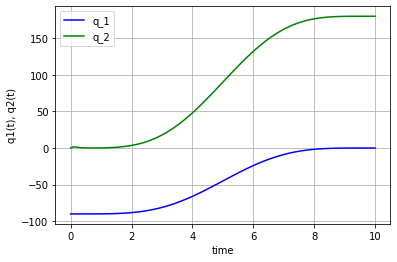

In [10]:
import Animation as anim
import numpy as np
from scipy.integrate import odeint,solve_ivp
import matplotlib.pyplot as plt
from Model import model_nlin, model_nlin_ext
from Vorsteuerung import *

x0=[-np.pi/2,0,0,np.pi/4]       # x0 = [q1,q2,qd1,qd2]

# define the discretization points
t_start = 0
t_stop = 10
dt = 1e-1

t_sim=np.linspace(t_start, t_stop, int((t_stop - t_start) / dt + 1))

# Define the controller
class Controller:
  def __init__(self,u,t_sim):
    import sympy as sym
    from Vorsteuerung import flat_output
    self.w1 = 10
    self.w2 = 10
    self.ctr = 'multivariable'
    self.k0 = sym.Matrix([[self.w1**2, 0],[0, self.w2**2]])
    self.k1 = sym.Matrix([[2*self.w1, 0],[0, 2*self.w2]])
    self.u  = u
    self.t  = t_sim

# Define the input vector
u1 = flat_output(t_stop,t_sim,3,x0[0],0)
u2 = flat_output(t_stop,t_sim,3,0,np.pi)

u= np.vstack((u1[0,:],u2[0,:],u1[1,:],u2[1,:],u1[2,:],u2[2,:]))

controller = Controller(u,t_sim)

#Wrapper für rechte Seite der Differentialgleichung
rhs=lambda t,x:model_nlin_ext(t,x,controller)
    
solOde = solve_ivp(rhs,                  #zu simulierendes Modell
                    [t_start,t_stop],    #Zeitspanne für Simulation
                    x0,                  #Anfangszustand 
                    t_eval=t_sim,        #Auswertungszeitpunkte
                    atol=1e-9,rtol=1e-6  #Toleranzen
                    )


plt.plot(solOde.t, solOde.y[0]*180/np.pi, 'b', label='q_1')
plt.plot(solOde.t, solOde.y[1]*180/np.pi, 'g', label='q_2')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('q1(t), q2(t)')
plt.grid()
#plt.savefig('simulation.png')
plt.show()

q1 = solOde.y[0]
q2 = solOde.y[1]
anim.plot(q1,q2,dt)


## Transformation 
### Kartesische Koordinaten in den Gelenkswinkelraum

$   \vec{\dot{X}} = J_{a(q)} \dot{q}   $  
mit  
$J_{a(q)} = 	
\begin{bmatrix} 
	I & 0 \\
	0 & B^{-1}(\alpha)
\end{bmatrix}
J(q)  $  

$J(q)\dot{q} = 
\begin{bmatrix}
\dot{x} \\ \dot{y} \\ \dot{z} \\
\dot{\omega_{x}} \\ \dot{\omega_{y}} \\ \dot{\omega_{z}} 
\end{bmatrix}$


$J(a)\dot{q} = 
\begin{bmatrix}
\dot{x} \\ \dot{y} \\ \dot{z} \\
\dot{\omega_{x}} \\ \dot{\omega_{y}} \\ \dot{\omega_{z}} 
\end{bmatrix}$





In [11]:
from Kinematik_2R import *

#display('B=', B_a)  #= sym.Matrix([[sym.cos(Psi)*sym.cos(Theta),-sym.sin(Theta), 0],[sym.sin(Psi)*sym.sin(Theta), sym.cos(Psi), 0],[sym.cos(Theta), 0, 1]])

#display('J(q) = ',J) #= Jv_2.col_join(sym.zeros(1,2)).col_join(Jw_2)

#X = sym.eye(3).col_join(sym.zeros(3,3))
#display('X=',X) #= X.row_join(sym.zeros(3,3).col_join(B_a))
display('Ja = ',Ja) #= X * J


a = np.matrix([[0.5,0.5,0,0,0,0]])



'B='

Matrix([
[cos(Psi)*cos(Theta), -sin(Theta), 0],
[sin(Psi)*sin(Theta),    cos(Psi), 0],
[         cos(Theta),           0, 1]])

'J(q) = '

Matrix([
[-l1*sin(q1) + l_s2*(-sin(q1)*cos(q2) - sin(q2)*cos(q1)), l_s2*(-sin(q1)*cos(q2) - sin(q2)*cos(q1))],
[ l1*cos(q1) + l_s2*(-sin(q1)*sin(q2) + cos(q1)*cos(q2)), l_s2*(-sin(q1)*sin(q2) + cos(q1)*cos(q2))],
[                                                      0,                                         0],
[                                                      0,                                         0],
[                                                      0,                                         0],
[                                                      1,                                         1]])

'X='

Matrix([
[1, 0, 0,                   0,           0, 0],
[0, 1, 0,                   0,           0, 0],
[0, 0, 1,                   0,           0, 0],
[0, 0, 0, cos(Psi)*cos(Theta), -sin(Theta), 0],
[0, 0, 0, sin(Psi)*sin(Theta),    cos(Psi), 0],
[0, 0, 0,          cos(Theta),           0, 1]])

'Ja = '

Matrix([
[-l1*sin(q1) + l_s2*(-sin(q1)*cos(q2) - sin(q2)*cos(q1)), l_s2*(-sin(q1)*cos(q2) - sin(q2)*cos(q1))],
[ l1*cos(q1) + l_s2*(-sin(q1)*sin(q2) + cos(q1)*cos(q2)), l_s2*(-sin(q1)*sin(q2) + cos(q1)*cos(q2))],
[                                                      0,                                         0],
[                                                      0,                                         0],
[                                                      0,                                         0],
[                                                      1,                                         1]])

### Analytische Jacobimatrix

In [12]:
'''Vorwärtskinematik'''
from Kinematik_2R import *
import Parameter as param

# Für Nummerische Berechnung T0e
# Für symbolische Berechnung T03sub    --> nicht bei der Inversen Matrix zu empfehlen --> hoher Rechenaufwand

T02_sub = T02.subs({a1:param.l1,a2:param.l2,alpha1:0, alpha2:0,d1:0,d2:0})
display(T02_sub)

# Reduzierung der Matrix auf die Position (erste Spalte)
T02_sub_ = T02_sub*sym.Matrix([1,0,0,0])

X_sub = T02_sub_.subs({q1:0, q2:np.pi/2})
display('X = ',X_sub[1:4])                            # Ausgabe  erste Ziele dient der homogenosierung X = [1, x, y, z]


''' Inverse Kinematik '''
x,y = 1, 1
X = sym.Matrix([1,x,y,0])                      # 1 dient der homogenisierung, z muss immer 0 sein, da der Roboter sich nur in der Ebene bewegen kann!

solution_set = sym.solve(T02_sub_-X, q1,q2, set = True)   # Berechnung dauert sehr lange, mitunter gibt es auch keine Lösung
display('Solution =' ,solution_set)  # Ausgabe



#q1,q2 = sym.symbols('q1, q2',  real=True)
Equation = sym.Eq(T02_sub_-X)
solution = sym.nonlinsolve(Equation, [q1, q2])

print(solution)  # Ausgabe



Matrix([
[                                           1,                                  0,                                  0, 0],
[-sin(q1)*sin(q2) + cos(q1)*cos(q2) + cos(q1), -sin(q1)*sin(q2) + cos(q1)*cos(q2), -sin(q1)*cos(q2) - sin(q2)*cos(q1), 0],
[ sin(q1)*cos(q2) + sin(q1) + sin(q2)*cos(q1),  sin(q1)*cos(q2) + sin(q2)*cos(q1), -sin(q1)*sin(q2) + cos(q1)*cos(q2), 0],
[                                           0,                                  0,                                  0, 1]])

'X = '

[1.00000000000000, 1.00000000000000, 0]

'Solution ='

([q1, q2], {(0, pi/2)})

EmptySet


/usr/lib/python3/dist-packages/sympy/core/relational.py:500: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  ).warn()


# Multivariable Control mit Transformation

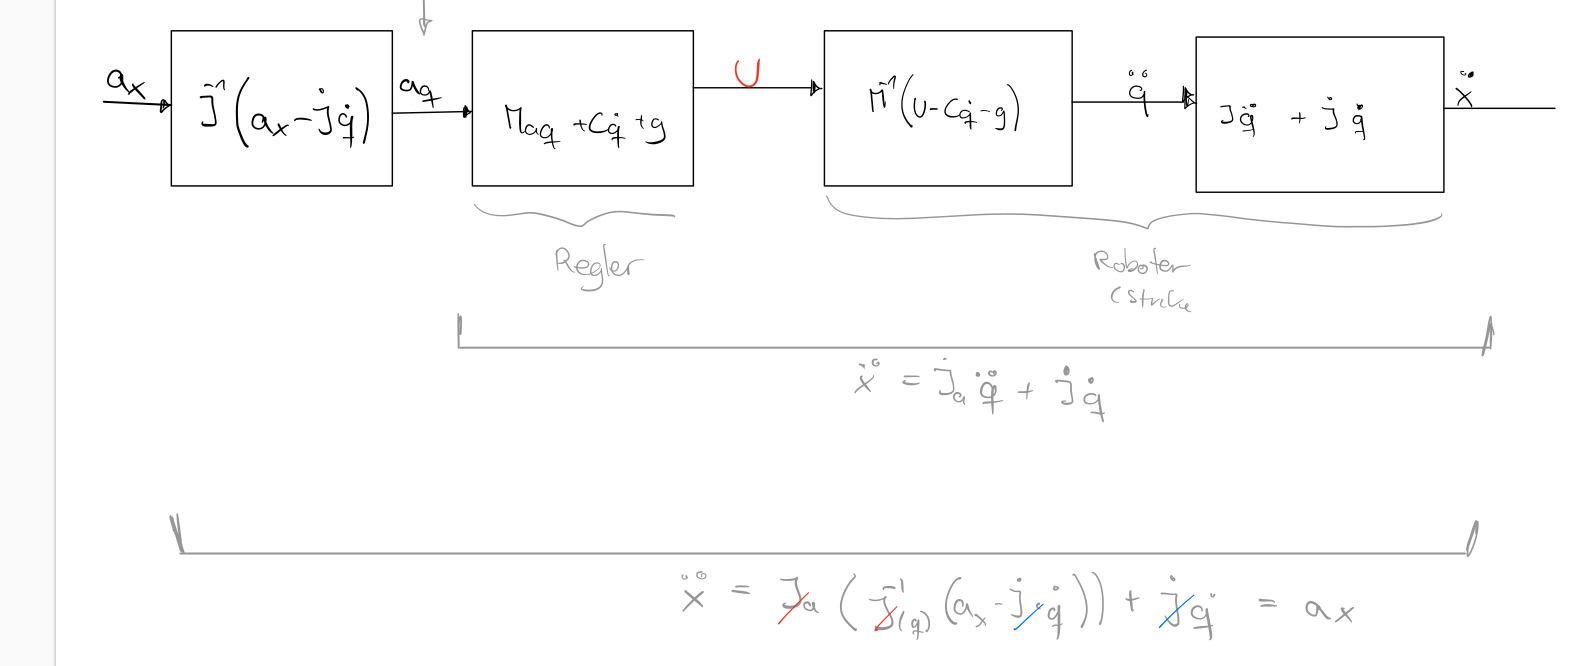

## Vorsteuerung 
Berechnung der Startposition mit Hilfe der Inversen Kinematik.  
Überprüfung der Strt und Endpunkte (Erreichbarkeit)   
Plotten der Trajektorie für eine Koordinate

[(0, -pi/2)]

[(0, pi/2)]

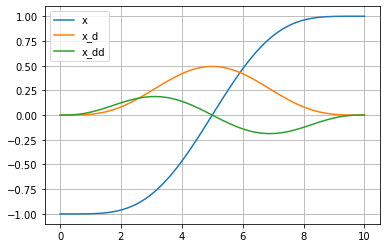

In [16]:

from Vorsteuerung import *

'''Vorwärtskinematik'''
from Kinematik_2R import T02
import Parameter as param


T02_sub = T02.subs({a1:param.l1,a2:param.l2,alpha1:0, alpha2:0,d1:0,d2:0})

# Reduzierung der Matrix auf die Position (erste Spalte)
T02_sub_ = T02_sub*sym.Matrix([1,0,0,0])


''' Inverse Kinematik '''
# Überprüfung der Punkte und Berechnung der Startkonfiguration
x,y = np.array([1,1]), np.array([-1,1])

# Startpunkt
X = sym.Matrix([1,x[0],y[0],0])                                 # 1 dient der homogenisierung, z muss immer 0 sein, da der Roboter sich nur in der Ebene bewegen kann!
start = sym.solve(T02_sub_-X, q1,q2)   # Berechnung dauert sehr lange, mitunter gibt es auch keine Lösung
display(start)

# Zielpunkt
X = sym.Matrix([1,x[1],y[1],0])                                 # 1 dient der homogenisierung, z muss immer 0 sein, da der Roboter sich nur in der Ebene bewegen kann!
ziel = sym.solve(T02_sub_-X, q1,q2) 
display(ziel)



u = flat_output(t_stop,t_sim,3,y[0], y[1])

plt.plot(t_sim,u[0,:])
plt.plot(t_sim,u[1,:])
plt.plot(t_sim,u[2,:])
plt.legend(['y','y_d','y_dd'])
plt.grid()
plt.show()


# Multivariable Control

In [ ]:
import Animation as anim
import numpy as np
from scipy.integrate import odeint,solve_ivp
import matplotlib.pyplot as plt
from Model import model_nlin, model_nlin_ext
from Vorsteuerung import *

x0=[-np.pi/2,0,0,np.pi/4]       # x0 = [q1,q2,qd1,qd2]

# define the discretization points
t_start = 0
t_stop = 10
dt = 1e-1

t_sim=np.linspace(t_start, t_stop, int((t_stop - t_start) / dt + 1))

# Define the controller
class Controller:
  def __init__(self,u,t_sim):
    import sympy as sym
    from Vorsteuerung import flat_output
    self.w1 = 10
    self.w2 = 10
    self.ctr = 'multivariable'
    self.k0 = sym.Matrix([[self.w1**2, 0],[0, self.w2**2]])
    self.k1 = sym.Matrix([[2*self.w1, 0],[0, 2*self.w2]])
    self.u  = u
    self.t  = t_sim

# Define the input vector
u1 = flat_output(t_stop,t_sim,3,x0[0],0)
u2 = flat_output(t_stop,t_sim,3,0,np.pi)

u= np.vstack((u1[0,:],u2[0,:],u1[1,:],u2[1,:],u1[2,:],u2[2,:]))

controller = Controller(u,t_sim)

#Wrapper für rechte Seite der Differentialgleichung
rhs=lambda t,x:model_nlin_ext(t,x,controller)
    
solOde = solve_ivp(rhs,                  #zu simulierendes Modell
                    [t_start,t_stop],    #Zeitspanne für Simulation
                    x0,                  #Anfangszustand 
                    t_eval=t_sim,        #Auswertungszeitpunkte
                    atol=1e-9,rtol=1e-6  #Toleranzen
                    )


plt.plot(solOde.t, solOde.y[0]*180/np.pi, 'b', label='q_1')
plt.plot(solOde.t, solOde.y[1]*180/np.pi, 'g', label='q_2')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('q1(t), q2(t)')
plt.grid()
#plt.savefig('simulation.png')
plt.show()

q1 = solOde.y[0]
q2 = solOde.y[1]
anim.plot(q1,q2,dt)
